# **Analyse avancée des données du site web et des réseaux sociaux**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
chemin_csv = r'C:\Users\arthu\OneDrive\Documents\Projet_Claudie_Perrigaud\donnees_globales.csv'
# r pour ne pas tenir cmpte des caractèrees d'échappements spéciaux et intérpréter tel quel la ligne.
df = pd.read_csv(chemin_csv)
print(df.head())

         date  couverture_facebook  visites_facebook  interactions_facebook  \
0  2024-08-07                   40                 2                      3   
1  2024-08-08                    4                 0                      1   
2  2024-08-09                    2                 0                      0   
3  2024-08-10                   12                 0                      4   
4  2024-08-11                   26                 3                      7   

   couverture_instagram  interactions_instagram  visites_instagram  sessions  \
0                   112                       0                  3         2   
1                     5                       0                  2         5   
2                     4                       0                  3         2   
3                    51                       0                 21         1   
4                    48                       0                  6         4   

   totalUsers  screenPageViews  averageSessi

### Conversion de la colonne 'date' en format datetime

In [36]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')  # 'coerce' convertit les valeurs invalides en NaT

In [41]:
print(df.dtypes)

date                      datetime64[ns]
couverture_facebook                int64
visites_facebook                   int64
interactions_facebook              int64
couverture_instagram               int64
interactions_instagram             int64
visites_instagram                  int64
sessions                           int64
totalUsers                         int64
screenPageViews                    int64
averageSessionDuration           float64
bounceRate                       float64
engagedSessions                    int64
newUsers                           int64
eventCount                         int64
conversion_facebook              float64
conversion_instagram             float64
dtype: object


### 1. Analyse de corrélation entre réseaux sociaux et site web

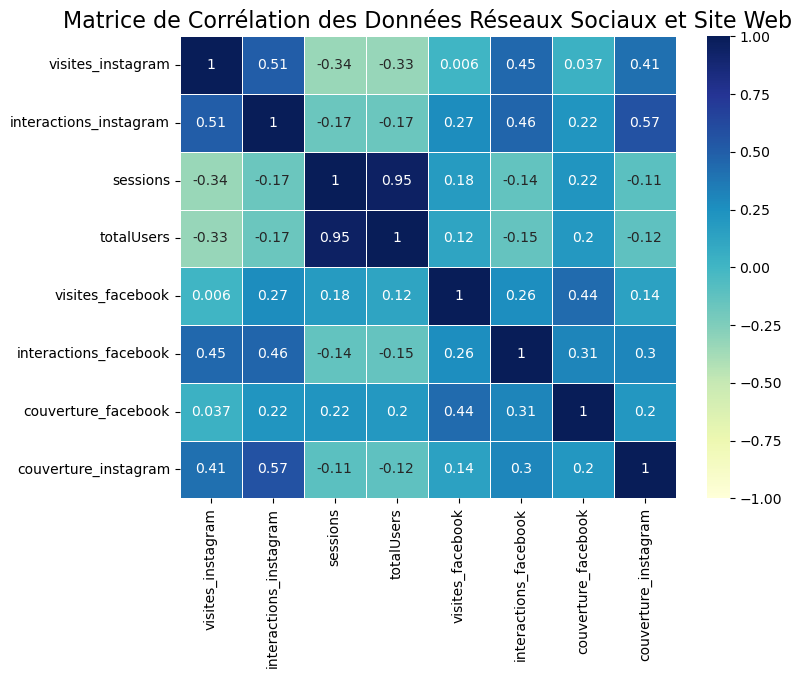

In [13]:
matrice_correlation = df[['visites_instagram', 'interactions_instagram', 'sessions', 'totalUsers','visites_facebook','interactions_facebook','couverture_facebook', 'couverture_instagram']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(matrice_correlation, annot=True, cmap='YlGnBu', vmin=-1, vmax=1, linewidths=0.5)

plt.title('Matrice de Corrélation des Données Réseaux Sociaux et Site Web', fontsize=16)
plt.show()
## [[]] pour sélectionner plusieurs colonnes du dtaframe

#### On remarque tout d'abord une corrélation assez importante entre les métriques Facebook et Instagram (0.2 à 0.5) ce qui montre qu'une augmentation du trafic sur le compte Facebook de l'artiste traduira une augmentation du trafic sur Instagram également. Les relations restent cependant modérée ce qui siginfient qu'elles restent à nuancer.
#### Pour ce qui est des relations entre le métriques du site web et celles des réseaux, elles sont inférieures à 0.15. Ainsi, les relations ne sont pas significatives et il semble difficile d'en déduire des conclusions.

In [53]:
# Filtroons les données pour la période d'août (8 août - 7 septembre 2024)
Aout = df[(df['date'] >= '2024-08-08') & (df['date'] <= '2024-09-07')]
# Filtrons les données pour la période de septembre (8 septembre - 7 octobre 2024)
Septembre = df[(df['date'] >= '2024-09-08') & (df['date'] <= '2024-10-07')]

#### Nombre de données par période

In [55]:
print("Données d'août :")
print(Aout[['date', 'totalUsers']].head())  # Afficher les premières lignes pour août
print("Nombre total d'entrées pour août :", len(Aout))

print("\nDonnées de septembre :")
print(Septembre[['date', 'totalUsers']].head())  # Afficher les premières lignes pour septembre
print("Nombre total d'entrées pour septembre :", len(Septembre))


Données d'août :
        date  totalUsers
1 2024-08-08           5
2 2024-08-09           2
3 2024-08-10           1
4 2024-08-11           4
5 2024-08-12           4
Nombre total d'entrées pour août : 29

Données de septembre :
         date  totalUsers
30 2024-09-08           0
31 2024-09-09           0
32 2024-09-10           1
33 2024-09-11           2
34 2024-09-12           0
Nombre total d'entrées pour septembre : 30


### Comparaison des résultats entre aout et septembre

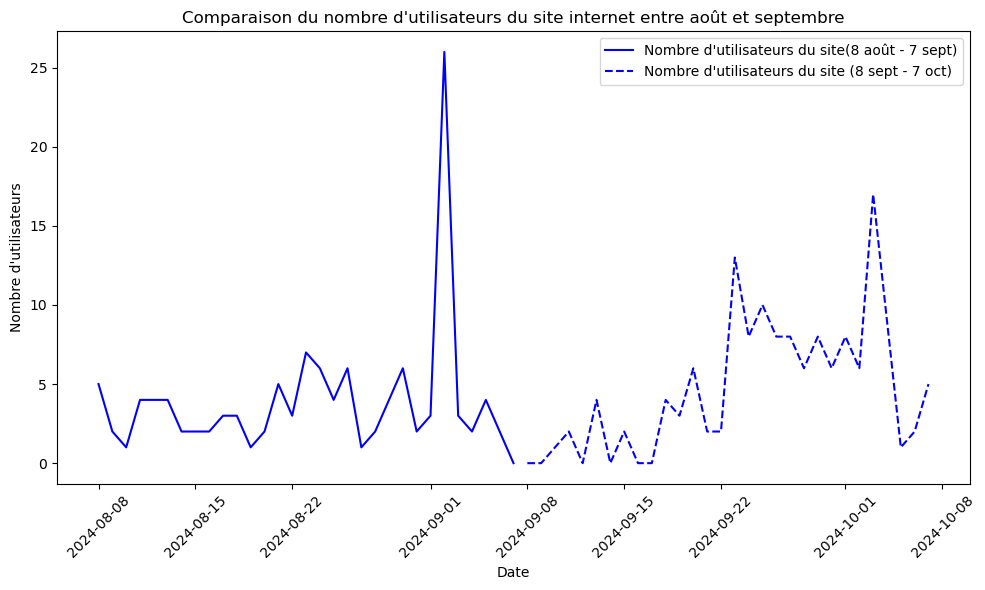

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(Aout['date'], Aout['totalUsers'], label="Nombre d'utilisateurs du site(8 août - 7 sept)", color='blue')
plt.plot(Septembre['date'], Septembre['totalUsers'], label="Nombre d'utilisateurs du site (8 sept - 7 oct)", color='blue', linestyle='--')

# Graphique
plt.title("Comparaison du nombre d'utilisateurs du site internet entre août et septembre")
plt.xlabel('Date')
plt.ylabel("Nombre d'utilisateurs")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [43]:
# Filtrer les deux périodes
Aout = df[(df['date'] >= '2023-08-08') & (df['date'] <= '2023-09-07')]
Septembre = df[(df['date'] >= '2023-09-08') & (df['date'] <= '2023-10-07')]

In [28]:
print(Aout[['totalUsers']].head())
print(Septembre[['totalUsers']].head())


Empty DataFrame
Columns: [totalUsers]
Index: []
Empty DataFrame
Columns: [totalUsers]
Index: []


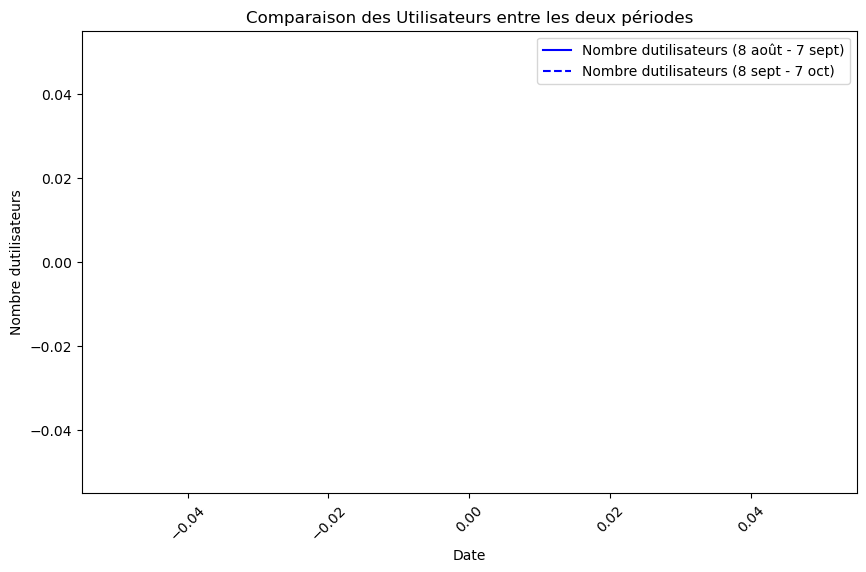

In [26]:
plt.figure(figsize=(10, 6))

# Tracer les visites Facebook pour les deux périodes
plt.plot(Aout.index, Aout['totalUsers'], label='Nombre dutilisateurs (8 août - 7 sept)', color='blue')
plt.plot(Septembre.index, Septembre['totalUsers'], label='Nombre dutilisateurs (8 sept - 7 oct)', color='blue', linestyle='--')

plt.title('Comparaison des Utilisateurs entre les deux périodes')
plt.xlabel('Date')
plt.ylabel('Nombre dutilisateurs')
plt.legend()
plt.xticks(rotation=45)
plt.show()
